In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

In [53]:
LOOKAHEAD = 7
SPLIT_DATE = "2015-01-01"

In [62]:
COLS_TO_DROP_TIME = ['date', 'season_num', 'year', 'month', 'day', 'week', 'weekday', 'month_sin', 'month_cos']

TARGET_COLS_7D = [
    't2m_d1_forecast', 't2m_d2_forecast', 't2m_d3_forecast', 't2m_d4_forecast', 
    't2m_d5_forecast', 't2m_d6_forecast', 't2m_d7_forecast'
]

In [63]:
SELECTED_FEATURES_FROM_LGBM = ['month_progress', 'dayofyear', 'doy_sin', 'tsoil4_roll7_std', 'gwettop_roll7_std', 'tsoil3_roll7_std', 't2m_trend_strength', 'ts_max_roll7_std', 'to3', 'rhoa_roll7_std', 'rhoa_roll3_std', 'tsoil4_lag7', 'gwettop_roll3_std', 'doy_cos', 'tsoil4_roll3_std', 'ts_min_roll7_std', 't10m_min_roll7_std', 'tsoil4', 'to3_lag7', 't10m_max_roll7_std', 'gwetprof_roll7_std', 'to3_lag3', 'to3_lag5', 'v2m_roll7_std', 't2m_anomaly_lag3', 't2m_rolling_iqr', 'v50m_roll7_std', 'tsoil2_roll7_std', 't2mwet_roll7_std', 't2m_anomaly', 'gwetroot_roll7_std', 'to3_lag4', 'to3_lag6', 'tsoil3_lag7', 'ts_min_roll3_std', 'to3_lag1', 't2m_min_roll7_std', 't2m_max_roll7_std', 't2m_anomaly_lag2', 'v2m_roll7_mean', 'temp_gradient_surface_lag3', 'temp_gradient_surface_lag1', 't2m_volatility_3d_lag1', 'temp_gradient_altitude', 't10m_roll7_std', 'tsoil2_roll3_std', 'ts_roll7_std', 'soil_temp_gradient_deep', 'soil_temp_moisture', 'temp_gradient_surface', 'gwetroot_roll3_std', 'gwetprof_roll3_std', 'ts_max_roll3_std', 't10m_min_roll3_std', 'to3_lag2', 't2m_rolling_p75', 'v50m_roll3_std', 'soil_temp_gradient_shallow', 't2m_roll7_std', 't2mwet_roll3_std', 't2m_daily_change', 'tsoil3_roll3_std', 'v10m_roll7_std', 'v2m_roll3_std', 'tsoil3', 't2m_volatility_3d_lag2', 't2m_momentum_7d', 'evptrns_lag7', 'week_cos', 't2m_daily_change_lag2', 't2m_rolling_p25', 'ts_max_roll7_mean', 't2m_position_in_week', 't2m_anomaly_lag1', 'tsurf_roll7_std', 't2mwet_roll7_mean', 'v50m_roll7_mean', 't2m_relative_to_recent_min', 't2m_max_roll3_std', 'tsoil4_lag5', 'gwettop_lag7', 't10m_range', 't10m_max_roll3_std', 'ts_range_lag3', 't2m_volatility_3d_lag3', 't10m_max_roll7_mean', 'tsoil1_roll3_std', 'week_sin', 'tsoil4_lag6', 't2mwet_lag7', 't2m_min_roll3_std', 'tsoil1_roll7_std', 'tsoil3_lag6', 'rhoa_roll7_mean', 'gwettop_roll7_mean', 't10m_max_lag7', 'v10m_roll3_std', 'tsoil2_roll7_mean', 'evptrns_lag3', 'evptrns_lag6', 'temp_gradient_soil', 'ts_min_roll7_mean', 't2m_momentum_3d', 't10m_range_lag7', 't2m_daily_change_lag3', 't2m_daily_change_lag1', 't2mwet', 'v2m_lag4', 'ts_range_lag7', 'ts_max', 'v50m_lag7', 'ts_range', 'ts', 'v50m_lag5', 'et_total_lag7', 't10m_range_lag5', 't2m_volatility_7d', 'v10m_roll7_mean', 'tsoil4_lag4', 'v2m_lag6', 't10m_min_roll7_mean', 'temp_gradient_surface_lag2', 'evptrns_lag1', 't2mwet_lag3', 'evaporation_potential', 't2m_max_roll7_mean', 'tsoil2_lag7', 'ts_min_lag3', 'evland_lag7', 'et_total', 'v2m_lag7', 'evland_lag2', 'ts_min_roll3_mean', 'v2m_lag3', 'v2m_roll3_mean', 't10m_min_lag7', 't10m_max_lag4', 'ts_roll3_std', 'tsoil3_roll7_mean', 'v50m_lag3', 'evland_lag1', 'tsoil4_lag2', 'v50m_lag4', 'v2m_lag2', 't10m_roll3_std', 'v50m', 't10m_lag7', 'evland', 't10m_min', 'ts_min_lag1', 'ts_max_lag7', 't2m_range_lag7', 'v50m_lag6', 'surface_efficiency', 't2mwet_roll3_mean', 'tsoil1_lag7', 'v50m_roll3_mean', 't2m_range', 't10m_max', 't2mwet_lag5', 't10m_range_lag4', 'tsoil4_lag1', 'v2m_lag5', 't2m_roll3_std', 'ts_min_lag7', 't2m_min_roll7_mean', 't10m_max_roll3_mean', 'ts_range_lag2', 'gwettop_roll3_mean', 'tsoil4_roll7_mean', 't2m_range_lag5', 't2m_max_lag5', 't2m_range_lag1', 't2m_max', 'v50m_lag2', 'evptrns_lag2', 't10m_max_lag5', 'tsoil2_lag5', 'ts_max_roll3_mean', 'v50m_lag1', 't10m_range_lag2', 't2mwet_lag4', 'et_total_lag3', 't2m_max_lag7', 'tsoil4_roll3_mean', 't10m_min_lag5', 't10m_min_roll3_mean', 'evland_lag5', 'ts_range_lag5', 'evptrns', 't2m_acceleration', 'tsoil3_lag5', 'evland_lag6', 'evptrns_lag5', 't10m_range_lag6', 'et_total_lag1', 'ts_max_lag6', 'gwetprof_lag7', 'evland_lag4', 't10m_min_lag6']

In [64]:
FILE_PATH = "../Dataset/FeatureEngineering_T2M_data.csv" 
df = pd.read_csv(FILE_PATH, parse_dates=["date"])
df = df.sort_values("date").copy()

print(f"Loaded new dataset with shape: {df.shape}")

Loaded new dataset with shape: (16365, 399)


In [65]:
COLS_TO_DROP_FINAL = COLS_TO_DROP_TIME + TARGET_COLS_7D 
X = df.drop(columns=COLS_TO_DROP_FINAL, errors='ignore').copy()
Y = df[TARGET_COLS_7D].copy()

In [66]:
valid_indices = X.dropna().index
X = X.loc[valid_indices].copy()
Y = Y.loc[valid_indices].copy()

In [67]:
split_date = pd.to_datetime(SPLIT_DATE)

df_split = df.loc[valid_indices]

In [68]:
X_train_all = X[df_split['date'] < split_date]
X_test_all = X[df_split['date'] >= split_date]
y_train = Y[df_split['date'] < split_date]
y_test = Y[df_split['date'] >= split_date]

test_dates = df_split[df_split['date'] >= split_date]['date']

print(f"X shape: {X.shape}, Y shape: {Y.shape}")
print(f"Train size: {X_train_all.shape}, Test size: {X_test_all.shape}")

X shape: (16365, 388), Y shape: (16365, 7)
Train size: (12398, 388), Test size: (3967, 388)


In [69]:
X_train_fs = X_train_all[SELECTED_FEATURES_FROM_LGBM].copy()
X_test_fs = X_test_all[SELECTED_FEATURES_FROM_LGBM].copy()

print(f"--- Feature Filtering Complete ---")
print(f"Train size (Selected Features): {X_train_fs.shape}")
print(f"Test size (Selected Features): {X_test_fs.shape}")
print(f"Selected Features used: {len(SELECTED_FEATURES_FROM_LGBM)} features.")

--- Feature Filtering Complete ---
Train size (Selected Features): (12398, 200)
Test size (Selected Features): (3967, 200)
Selected Features used: 200 features.


In [70]:
rf_params = {
    "n_estimators": 500,      
    "max_depth": 10,          
    "random_state": 42,
    "n_jobs": -1
}

In [71]:
model = MultiOutputRegressor(RandomForestRegressor(**rf_params))

print("\nStart training Random Forest Multi-Output Model...")
model.fit(X_train_fs, y_train)
print("Random Forest Training Complete.")

preds = model.predict(X_test_fs)


Start training Random Forest Multi-Output Model...
Random Forest Training Complete.


In [73]:
rmse_scores = []
r2_scores = []
mape_scores = []

for i in range(LOOKAHEAD):
    actual = y_test.iloc[:, i]
    predicted = preds[:, i]
    
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    rmse_scores.append(rmse)
    
    r2 = r2_score(actual, predicted)
    r2_scores.append(r2)

    mape = mean_absolute_percentage_error(actual, predicted)
    mape_scores.append(mape)
    
    print(f"{Y.columns[i]} | RMSE: {rmse:.4f} | R²: {r2:.4f} ({r2*100:.2f}%) | MAPE: {mape*100:.2f}%")

t2m_d1_forecast | RMSE: 0.6923 | R²: 0.8578 (85.78%) | MAPE: 1.85%
t2m_d2_forecast | RMSE: 0.9618 | R²: 0.7249 (72.49%) | MAPE: 2.57%
t2m_d3_forecast | RMSE: 1.0824 | R²: 0.6511 (65.11%) | MAPE: 2.90%
t2m_d4_forecast | RMSE: 1.1477 | R²: 0.6077 (60.77%) | MAPE: 3.08%
t2m_d5_forecast | RMSE: 1.1846 | R²: 0.5823 (58.23%) | MAPE: 3.18%
t2m_d6_forecast | RMSE: 1.1995 | R²: 0.5720 (57.20%) | MAPE: 3.22%
t2m_d7_forecast | RMSE: 1.2066 | R²: 0.5673 (56.73%) | MAPE: 3.24%


In [74]:
avg_rmse = np.mean(rmse_scores)
avg_r2 = np.mean(r2_scores)
avg_mape_percent = np.mean(mape_scores) * 100

print("\n" + "=" * 50)
print("สรุปผลลัพธ์เฉลี่ย Multi-Output (7 วัน)")
print(f"Average RMSE : {avg_rmse:.4f} °C")
print(f"Average R² : {avg_r2:.4f} ({avg_r2*100:.2f}%)")
print(f"Average MAPE : {avg_mape_percent:.2f}%")
print("=" * 50)


สรุปผลลัพธ์เฉลี่ย Multi-Output (7 วัน)
Average RMSE : 1.0679 °C
Average R² : 0.6519 (65.19%)
Average MAPE : 2.86%


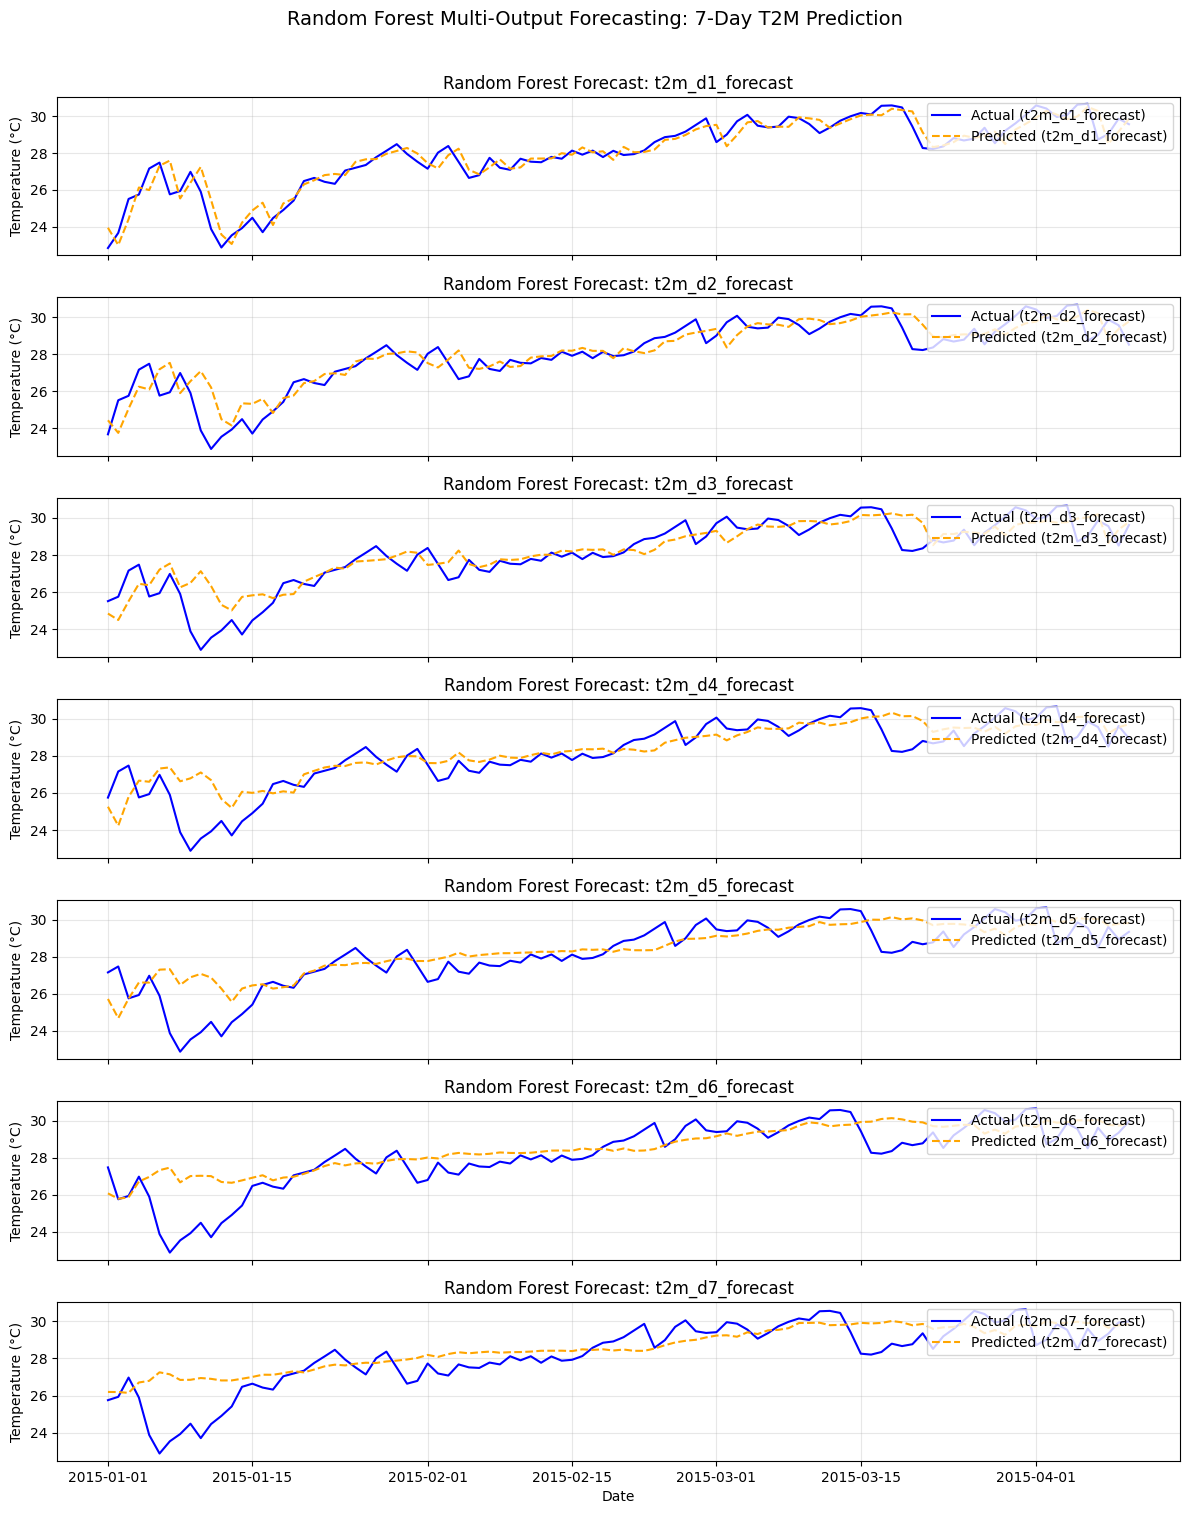

In [75]:
fig, axes = plt.subplots(LOOKAHEAD, 1, figsize=(12, 2.2 * LOOKAHEAD), sharex=True)
sample_size = 100

for i in range(LOOKAHEAD):
    axes[i].plot(test_dates.iloc[:sample_size], y_test.iloc[:sample_size, i].values, label=f"Actual ({TARGET_COLS_7D[i]})", color='blue')
    axes[i].plot(test_dates.iloc[:sample_size], preds[:sample_size, i], linestyle="--", label=f"Predicted ({TARGET_COLS_7D[i]})", color='orange')
    
    axes[i].set_title(f"Random Forest Forecast: {TARGET_COLS_7D[i]}")
    axes[i].set_ylabel("Temperature (°C)")
    axes[i].legend(loc="upper right")
    axes[i].grid(True, alpha=0.3)

axes[-1].set_xlabel("Date")
plt.suptitle("Random Forest Multi-Output Forecasting: 7-Day T2M Prediction", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()